<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/draping/final_algorithm%2Bdraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe==0.10.8
!pip install mediapipe opencv-python
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=948304d07e08a4d4fa3963b5b7a4cc27596b081d2ddac519c842c708a43edf65
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


<ipython-input-8-83bd71a0f82b>:104: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=============================전체 클러스터 중심값=============================
Cluster 1 Center (RGB): [184.89785344 154.96471749 137.26334403]
Cluster 2 Center (RGB): [223.2450108 192.5650108 175.0799568]
Cluster 3 Center (RGB): [168.87078882 139.33186113 120.8173788 ]
Cluster 4 Center (RGB): [92.96161417 70.08956693 63.93307087]
Cluster 5 Center (RGB): [211.7552354  181.06462568 163.09549781]
Cluster 6 Center (RGB): [146.89969462 116.95795161 102.32746065]
Cluster 7 Center (RGB): [233.9567414  204.68555941 191.5389959 ]
Cluster 8 Center (RGB): [199.12120623 168.40415045 150.52652399]
=============================전체 클러스터 픽셀수=============================
Cluster 2 Size: 23150 pixels
Cluster 7 Size: 19002 pixels
Cluster 5 Size: 19517 pixels
Cluster 8 Size: 15338 pixels
Cluster 1 Size: 12159 pixels
Cluster 3 Size: 9739 pixels
Cluster 6 Size: 4254 pixels
Cluster 4 Size: 1016 pixels
전체 픽셀 수: 104175
=============================Color distance계산=============================
가장 픽셀 수가 많은 클러스터: 2
첫 번째로 

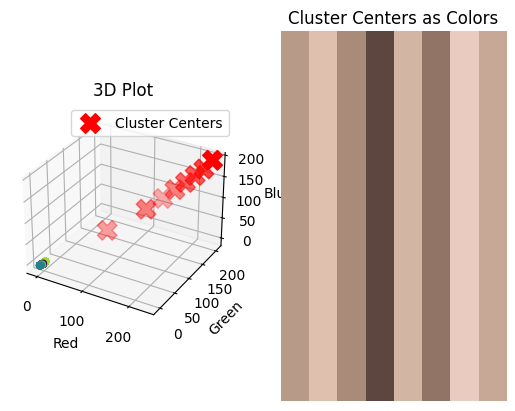

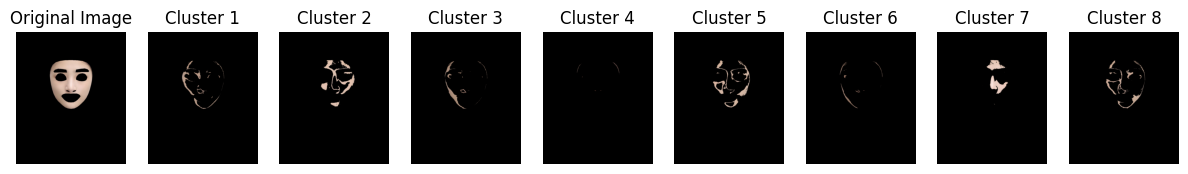

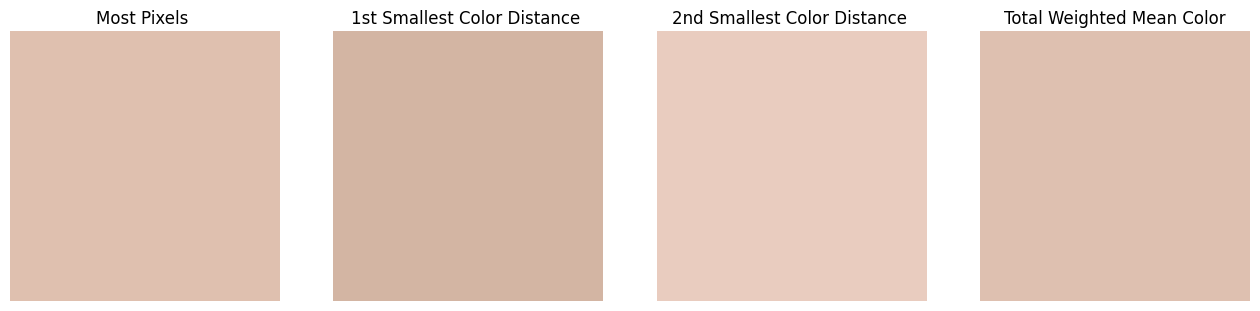

=============================변환=============================
평균 RGB 값: [222.90166859 192.65133211 176.34985163]
Lab: L=80.07150103478584, a=8.196299678288943, b=12.165349403925463
HSV: H=21.010755175205304, S=0.20884463204643244, V=0.8741241905314235
=============================LbS=============================
 L=80.07150103478584, b=12.165349403925463, S=0.20884463204643244
이미지 저장경로: /content/cluster_images
베스트 퍼스널 컬러: 봄 Light
세컨드 컬러: 가을 Deep


In [8]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh



# 이미지 파일의 경우를 사용하세요.
IMAGE_FILES = ["/content/minzi.jpeg"]

with mp.solutions.face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # 작업 전에 BGR 이미지를 RGB로 변환합니다.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # 이미지에 출력하고 그 위에 얼굴 그물망 경계점을 그립니다.
        if not results.multi_face_landmarks:
            continue

        annotated_image = image.copy()

        for face_landmarks in results.multi_face_landmarks:
            # 얼굴 전체에 대한 랜드마크 그리기
            for landmark in face_landmarks.landmark:
                x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                #cv2.circle(annotated_image, (x, y), 1, (0, 255, 0), 1)

            # 얼굴의 왼쪽 눈과 오른쪽 눈을 검정색으로 채우기

            # eye indices
            left_eye = [243, 190, 56, 28, 27, 29, 30, 247, 226, 31, 228, 229, 230, 231, 232, 233, 243]
            right_eye = [463, 453, 452, 451, 450, 449, 448, 261, 446, 467, 260, 259, 257, 258, 286, 414, 463]
            # eyebrow indices
            left_eyebrow = [336, 296, 334, 293, 300, 276, 283, 282, 295, 285]
            right_eyebrow = [70, 63, 105, 66, 107, 55, 65, 52, 53, 46]
            # lips indices
            # lips = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61]
            lips = [164, 393, 391, 322, 410, 287, 273, 335, 406, 313, 18,83, 182, 106, 43, 57, 186, 92, 165, 167]
            # nostril indices
            left_nostril = [218, 239, 241, 242, 99, 240, 235, 219]
            right_nostril = [438, 439, 455, 460, 328, 462, 458, 459]
            # face indices
            face_outline = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]

            left_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eye])
            right_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eye])
            left_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eyebrow])
            right_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eyebrow])
            lip_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in lips])
            left_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_nostril])
            right_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_nostril])
            face_outline_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in face_outline])


             # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            mask = np.zeros_like(annotated_image)
            outside_mask = cv2.fillPoly(mask, [face_outline_points], (255, 255, 255))

             # 얼굴 부분만을 따로 잘라내기
            face_only = cv2.bitwise_and(image, outside_mask)

            # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            inside_mask = np.zeros_like(annotated_image)
            inside_mask = cv2.fillPoly(inside_mask, [face_outline_points], (255, 255, 255))

            # 얼굴 부분만을 따로 잘라내기
            face_inside = cv2.bitwise_and(image, inside_mask)


            cv2.fillConvexPoly(face_only, left_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, lip_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_nostril_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_nostril_points, color=(0, 0, 0))

        cv2.imwrite('/content/face_analysis' + str(idx) + '.png', face_only)
        cv2.imwrite('/content/face_draping' + str(idx) + '.png', face_inside)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import Counter
import imageio

from collections import Counter
from colormath.color_objects import sRGBColor, LabColor, HSVColor
from colormath.color_conversions import convert_color
import os

# 이미지 로드
image_path = "/content/face_analysis0.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

print(f'=============================전체 클러스터 중심값=============================')
for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

print(f'=============================전체 클러스터 픽셀수=============================')

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 첫 번째로 Color distance가 작은 클러스터 찾기
min_distance_1 = float('inf')
selected_cluster_1 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # 가장 픽셀 수가 많은 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# 두 번째로 Color distance가 작은 클러스터 찾기
min_distance_2 = float('inf')
selected_cluster_2 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # 가장 픽셀 수가 많은 클러스터와 첫 번째로 선택된 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# 각 클러스터에 속하는 픽셀의 수를 RGB값에 곱한 뒤, 세 개의 클러스터의 픽셀 수로 나누어 평균 RGB 값을 계산
most_pixels_cluster_size = cluster_sizes[most_pixels_cluster]
selected_cluster_1_size = cluster_sizes[selected_cluster_1]
selected_cluster_2_size = cluster_sizes[selected_cluster_2]

most_pixels_rgb_sum = np.sum(face_data[optimal_cluster_labels == most_pixels_cluster], axis=0)
selected_cluster_1_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_1], axis=0)
selected_cluster_2_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_2], axis=0)

most_pixels_rgb_mean_weighted = most_pixels_rgb_sum / most_pixels_cluster_size
selected_cluster_1_rgb_mean_weighted = selected_cluster_1_rgb_sum / selected_cluster_1_size
selected_cluster_2_rgb_mean_weighted = selected_cluster_2_rgb_sum / selected_cluster_2_size

total_rgb_sum_weighted = (most_pixels_rgb_sum + selected_cluster_1_rgb_sum + selected_cluster_2_rgb_sum)
total_rgb_mean_weighted = total_rgb_sum_weighted / (most_pixels_cluster_size + selected_cluster_1_size + selected_cluster_2_size)

print(f'=============================Color distance계산=============================')

# 결과 출력
print(f'가장 픽셀 수가 많은 클러스터: {most_pixels_cluster + 1}')
print(f'첫 번째로 Color distance가 작은 클러스터: {selected_cluster_1 + 1}')
print(f'두 번째로 Color distance가 작은 클러스터: {selected_cluster_2 + 1}')
print(f'첫 번째 Color distance: {min_distance_1}')
print(f'두 번째 Color distance: {min_distance_2}')

print(f'=============================가중평균=============================')
print(f'가장 픽셀 수가 많은 클러스터의 가중 평균 RGB 값: {most_pixels_rgb_mean_weighted}')
print(f'첫 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_1_rgb_mean_weighted}')
print(f'두 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_2_rgb_mean_weighted}')
print(f'세개의 클러스터의 가중 평균 RGB 값: {total_rgb_mean_weighted}')


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')



# 결과 색상 출력
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(most_pixels_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[0].set_title('Most Pixels ')
ax[0].axis('off')

ax[1].imshow(selected_cluster_1_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[1].set_title('1st Smallest Color Distance ')
ax[1].axis('off')

ax[2].imshow(selected_cluster_2_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[2].set_title('2nd Smallest Color Distance ')
ax[2].axis('off')

ax[3].imshow(total_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[3].set_title('Total Weighted Mean Color')
ax[3].axis('off')

plt.show()


print(f'=============================변환=============================')
# 평균 RGB 값 출력
print(f'평균 RGB 값: {total_rgb_mean_weighted}')

# RGB to Lab conversion
average_srgb = sRGBColor(total_rgb_mean_weighted[0], total_rgb_mean_weighted[1], total_rgb_mean_weighted[2], is_upscaled=True)
average_lab = convert_color(average_srgb, LabColor)

# 출력 Lab 값
print(f'Lab: L={average_lab.lab_l}, a={average_lab.lab_a}, b={average_lab.lab_b}')

# RGB to HSV conversion
average_hsv = convert_color(average_srgb, HSVColor)

# 출력 HSV 값
# s, v값은 비율입니당~
print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v}')

# L, b, S값 출력
print(f'=============================LbS=============================')
print(f' L={average_lab.lab_l}, b={average_lab.lab_b}, S={average_hsv.hsv_s}')



#교수님스미마셍
#출력결과 클러스터순서대로네요






#영역이미지 저장코드추가

# 이미지를 저장할 디렉토리
output_directory = "/content/cluster_images"
os.makedirs(output_directory, exist_ok=True)

# 클러스터 이미지 및 Total Weighted Mean Color 이미지 저장
for i, cluster_indices in enumerate([most_pixels_cluster, selected_cluster_1, selected_cluster_2]):
    cluster_pixels = face_data[optimal_cluster_labels == cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[optimal_cluster_labels == cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    # 이미지 저장
    cluster_filename = os.path.join(output_directory, f'cluster_{i + 1}.png')
    imageio.imwrite(cluster_filename, result_image)

# Total Weighted Mean Color 이미지 저장
total_weighted_mean_color_image = np.zeros((50, 50, 3), dtype=np.uint8)
total_weighted_mean_color_image[:, :] = total_rgb_mean_weighted.astype(np.uint8)
total_weighted_mean_color_filename = os.path.join(output_directory, 'total_weighted_mean_color.png')
imageio.imwrite(total_weighted_mean_color_filename, total_weighted_mean_color_image)

# 메시지 출력
print(f'이미지 저장경로: {output_directory}')



# 주어진 타입의 RGB 값들
spring_type_rgb = np.array([
    (251, 211, 168), (255, 202, 149),
    (253, 197, 161), (252, 204, 130)
])

summer_type_rgb = np.array([
    (253, 231, 174), (255, 219, 192),
    (254, 217, 170), (254, 210, 122)
])

fall_type_rgb = np.array([
    (255, 221, 150), (247, 206, 152),
    (249, 201, 128), (212, 169, 101)
])

winter_type_rgb = np.array([
    (255, 220, 147), (242, 206, 148),
    (247, 207, 121), (216, 173, 102)
])

# 주어진 타입과 total_rgb_mean_weighted 간의 거리 계산 함수
def calculate_distance(type_rgb, target_rgb):
    return np.mean(np.linalg.norm(type_rgb - target_rgb, axis=1))

# 새로운 타입별 거리 계산
spring_light_distance = calculate_distance(np.array([spring_type_rgb[0], spring_type_rgb[1]]), total_rgb_mean_weighted)
spring_clear_distance = calculate_distance(np.array([spring_type_rgb[2], spring_type_rgb[3]]), total_rgb_mean_weighted)

summer_light_distance = calculate_distance(np.array([summer_type_rgb[0], summer_type_rgb[1]]), total_rgb_mean_weighted)
summer_mute_distance = calculate_distance(np.array([summer_type_rgb[2], summer_type_rgb[3]]), total_rgb_mean_weighted)

fall_deep_distance = calculate_distance(np.array([fall_type_rgb[0], fall_type_rgb[1]]), total_rgb_mean_weighted)
fall_mute_distance = calculate_distance(np.array([fall_type_rgb[2], fall_type_rgb[3]]), total_rgb_mean_weighted)

winter_clear_distance = calculate_distance(np.array([winter_type_rgb[0], winter_type_rgb[1]]), total_rgb_mean_weighted)
winter_deep_distance = calculate_distance(np.array([winter_type_rgb[2], winter_type_rgb[3]]), total_rgb_mean_weighted)

# 거리를 토대로 정렬
distances = [
    ("봄 Light", spring_light_distance),
    ("봄 Clear", spring_clear_distance),
    ("여름 Light", summer_light_distance),
    ("여름 Mute", summer_mute_distance),
    ("가을 Deep", fall_deep_distance),
    ("가을 Mute", fall_mute_distance),
    ("겨울 Clear", winter_clear_distance),
    ("겨울 Deep", winter_deep_distance)
]

distances.sort(key=lambda x: x[1])


# 결과 출력
best_personal_color = distances[0][0]
second_personal_color = distances[1][0]

print(f'베스트 퍼스널 컬러: {best_personal_color}')
print(f'세컨드 컬러: {second_personal_color}')



Selected RGB Values for 봄 Light: [(189, 129, 63), (248, 192, 168), (245, 138, 114), (248, 168, 94), (251, 239, 127), (199, 222, 122), (162, 219, 233), (149, 112, 177)]
Selected RGB Values for 가을 Deep: [(20, 15, 12), (245, 150, 135), (116, 21, 20), (127, 74, 31), (77, 69, 26), (77, 105, 48), (20, 93, 120), (59, 32, 19)]


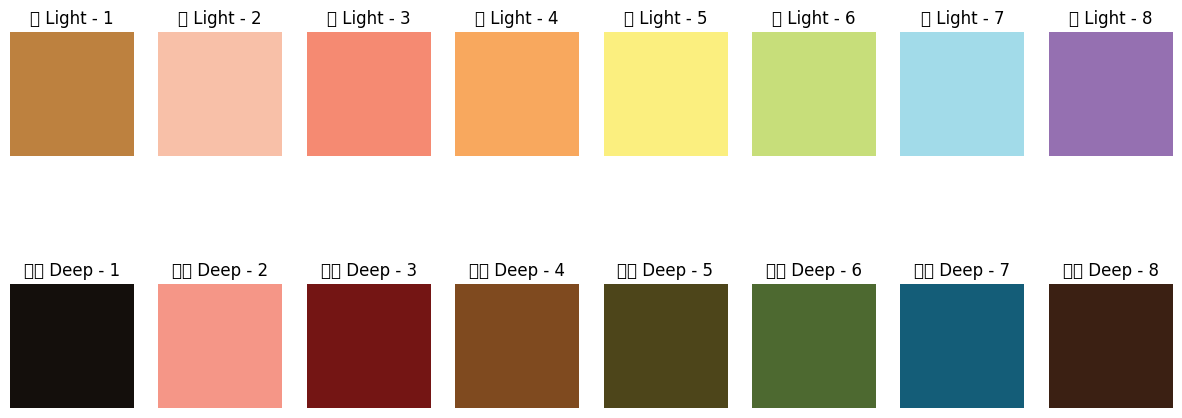

In [68]:
import os
import numpy as np
import cv2
import imageio

# 이미지 로드
image_path = "/content/face_draping0.png"
face_draping_image = cv2.imread(image_path)

# 각 개인 색상에 대한 RGB 값 딕셔너리
def select_rgb_values(personal_color):
    personal_color_rgb_values = {
        "봄 Light": [
            (189, 129, 63),
            (248, 192, 168),
            (245, 138, 114),
            (248, 168, 94),
            (251, 239, 127),
            (199, 222, 122),
            (162, 219, 233),
            (149, 112, 177)
        ],
        "봄 Clear": [
            (20, 15, 12),
            (246, 177, 161),
            (216, 49, 38),
            (224, 127, 41),
            (176, 163, 52),
            (43, 171, 80),
            (47, 85, 166),
            (47, 85, 166)
        ],
        "여름 Light": [
            (68, 88, 140),
            (200, 143, 192),
            (238, 89, 146),
            (182, 183, 184),
            (101, 195, 181),
            (125, 162, 206),
            (120, 110, 177),
            (146, 114, 178)
        ],
        "여름 Mute": [
            (137, 132, 144),
            (184, 136, 188),
            (198, 67, 116),
            (134, 128, 117),
            (65, 166, 137),
            (88, 116, 166),
            (106, 88, 165),
            (135, 97, 120)
        ],
        "가을 Mute": [
            (170, 125, 79),
            (242, 164, 129),
            (225, 106, 83),
            (226, 138, 62),
            (214, 203, 68),
            (129, 166, 63),
            (80, 156, 172),
            (119, 70, 153)
        ],
        "가을 Deep": [
            (20, 15, 12),
            (245, 150, 135),
            (116, 21, 20),
            (127, 74, 31),
            (77, 69, 26),
            (77, 105, 48),
            (20, 93, 120),
            (59, 32, 19)
        ],
        "겨울 Clear": [
            (20, 15, 11),
            (187, 84, 160),
            (237, 48, 139),
            (244, 134, 44),
            (244, 134, 44),
            (81, 83, 163),
            (108, 83, 162),
            (142, 83, 160)
        ],
        "겨울 Deep": [
            (62, 63, 103),
            (159, 51, 147),
            (169, 31, 93),
            (92, 37, 48),
            (15, 81, 41),
            (43, 41, 115),
            (64, 38, 107),
            (67, 30, 91)
        ]
    }
    return personal_color_rgb_values.get(personal_color, [])

# 베스트
selected_rgb_values_1 = select_rgb_values(best_personal_color)
#세컨드
selected_rgb_values_2 = select_rgb_values(second_personal_color)

# 출력
print(f"Selected RGB Values for {best_personal_color}: {selected_rgb_values_1}")
print(f"Selected RGB Values for {second_personal_color}: {selected_rgb_values_2}")


selected_rgb_values_1 = select_rgb_values(best_personal_color)
selected_rgb_values_2 = select_rgb_values(second_personal_color)

# 첫 번째 개인 색상에 대한 출력 및 이미지 생성 및 저장
output_folder_1 = "/content/best_draping"
os.makedirs(output_folder_1, exist_ok=True)

for i, rgb_values in enumerate(selected_rgb_values_1):
    output_image = face_draping_image.copy()
    black_pixels = np.all(output_image == [0, 0, 0], axis=-1)
    output_image[black_pixels] = [rgb_values[2], rgb_values[1], rgb_values[0]]
    output_path = os.path.join(output_folder_1, f"best_{i+1}.png")
    cv2.imwrite(output_path, output_image)

# 두 번째 개인 색상에 대한 출력 및 이미지 생성 및 저장
output_folder_2 = "/content/second_draping"
os.makedirs(output_folder_2, exist_ok=True)

for i, rgb_values in enumerate(selected_rgb_values_2):
    output_image = face_draping_image.copy()
    black_pixels = np.all(output_image == [0, 0, 0], axis=-1)
    output_image[black_pixels] = [rgb_values[2], rgb_values[1], rgb_values[0]]
    output_path = os.path.join(output_folder_2, f"second_{i+1}.png")
    cv2.imwrite(output_path, output_image)


# 시각화
fig, ax = plt.subplots(2, len(selected_rgb_values_1), figsize=(15, 6))

# 첫 번째 개인 색상 시각화
for i, rgb in enumerate(selected_rgb_values_1):
    color_patch = np.ones((100, 100, 3), dtype=np.uint8) * rgb
    ax[0, i].imshow(color_patch)
    ax[0, i].set_title(f"{best_personal_color} - {i+1}")
    ax[0, i].axis("off")

# 두 번째 개인 색상 시각화
for i, rgb in enumerate(selected_rgb_values_2):
    color_patch = np.ones((100, 100, 3), dtype=np.uint8) * rgb
    ax[1, i].imshow(color_patch)
    ax[1, i].set_title(f"{second_personal_color} - {i+1}")
    ax[1, i].axis("off")

plt.show()
